In [307]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [308]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
# Import My own library for factor testing
import factorFilterFunctions as ff
#from config import *

In [310]:
%matplotlib inline

In [311]:
# make sure that matplotib and seaborn can show Chinese
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [312]:
# Files to use 
filenamePrice='my_own_factor_AdjustedPriceForward.csv'
filenameST='LZ_GPA_SLCIND_ST_FLAG.csv'
filenameTradeday='LZ_GPA_SLCIND_TRADEDAYCOUNT.csv'
filenameStopFlag='LZ_GPA_SLCIND_STOP_FLAG.csv'
filenameIndu='LZ_GPA_INDU_ZX.csv'
filenameFCAP='LZ_GPA_VAL_A_FCAP.csv'
filenameAdjustFactor='LZ_GPA_CMFTR_CUM_FACTOR.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'
filenameZXIndustry = 'LZ_GPA_INDU_ZX.csv'
filenameZXExplanation = 'LZ_GPA_TMP_INDU_ZX.csv'

In [313]:
# Factors
# Value factor
filenamePE ='LZ_GPA_VAL_PE.csv'  # 市盈率
filenamePB ='LZ_GPA_VAL_PB.csv'  # 市净率
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%)
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%)
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%)
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%)
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动
filenameABORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv'

# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'      # 三月换手率均值
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'                   # 非流动性因子


In [314]:
# Constants
path = ff.data_path
timeStampNum = 2500
thresholdNum = 0.2
HSIndex='000300.SH'

In [315]:
#
sololist = [filenamePB]
#
filenameDict = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF, 'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT, \
                'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'TURNOVER_1M':filenameTURNOVER1M }

In [316]:
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
indusDF = pd.read_csv(path+filenameZXIndustry,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
induExplanation = pd.read_csv(path+filenameZXExplanation,infer_datetime_format=True,parse_dates=[0],encoding='gb2312')

In [317]:
induExplanation

,LZ_GPA_TMP_INDU_ZX-t
0,石油石化
1,煤炭
2,有色金属
3,电力及公用事业
4,钢铁
5,基础化工
6,建筑
7,建材
8,轻工制造
9,机械


In [318]:
explanationDict = induExplanation.iloc[:,0].to_dict()

In [319]:
stDF.head()

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,300618.SZ,603138.SH,603578.SH,300616.SZ,603908.SH,603991.SH,002852.SZ,002853.SZ,300620.SZ,603955.SH
LZ_GPA_SLCIND_ST_FLAG-t,,,,,,,,,,,,,,,,,,,,,
2006-11-27,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-28,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-29,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-30,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [320]:
## easy way to calculate the last day of the month
stDF['label'] = stDF.index.map(lambda x: (x.year,x.month))
#locationList=(stDF.groupby(['label']).size().cumsum()-1).values
#stDF.iloc[locationList].index
stDF.groupby(['label'])

In [321]:
priceData =  pd.read_csv(path+ filenamePrice ,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5][HSIndex]

In [322]:
LFCAPDF = np.log(ff.getData(filenameFCAP, timeStampNum, thresholdNum))

In [323]:
endOfMonthList = ff.getLastDayOfMonth(LFCAPDF.index)[1]

In [324]:
activeReturnData =ff.calcReturn(priceData, endOfMonthList, benchmark = benchMarkData,activeReturn = True,logReturn = False)

In [325]:
# Generate the useles stock list
filterdict={}
for i in endOfMonthList:
    suspendList = ff.GetSTNewSuspend(i,stDF,tradeDayDF,stopFlagDF)
    filterdict[i] = suspendList
    print i, len(filterdict[i])

2006-11-30 00:00:00 269
2006-12-29 00:00:00 308
2007-01-31 00:00:00 278
2007-02-28 00:00:00 289
2007-03-30 00:00:00 270
2007-04-30 00:00:00 340
2007-05-31 00:00:00 304
2007-06-29 00:00:00 325
2007-07-31 00:00:00 282
2007-08-31 00:00:00 300
2007-09-28 00:00:00 318
2007-10-31 00:00:00 309
2007-11-30 00:00:00 302
2007-12-28 00:00:00 325
2008-01-31 00:00:00 317
2008-02-29 00:00:00 316
2008-03-31 00:00:00 300
2008-04-30 00:00:00 297
2008-05-30 00:00:00 309
2008-06-30 00:00:00 320
2008-07-31 00:00:00 271
2008-08-29 00:00:00 242
2008-09-26 00:00:00 260
2008-10-31 00:00:00 231
2008-11-28 00:00:00 254
2008-12-31 00:00:00 231
2009-01-23 00:00:00 212
2009-02-27 00:00:00 219
2009-03-31 00:00:00 228
2009-04-30 00:00:00 250
2009-05-27 00:00:00 238
2009-06-30 00:00:00 258
2009-07-31 00:00:00 241
2009-08-31 00:00:00 258
2009-09-30 00:00:00 251
2009-10-30 00:00:00 282
2009-11-30 00:00:00 289
2009-12-31 00:00:00 318
2010-01-29 00:00:00 297
2010-02-26 00:00:00 332
2010-03-31 00:00:00 341
2010-04-30 00:00

In [326]:
### Calculate the return of each group of given factor(solo factor)
totalGroupDict ={}
factorData = ff.getData(sololist[0], timeStampNum, thresholdNum)
for date in endOfMonthList:
    factorDataTemp = factorData.loc[:date].tail()
    factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[date]))]
    #print factorDataTemp
    totalGroupDict[date] = ff.getStockGroup(factorDataTemp,Mean_Num=1)

In [327]:
ReturnDF = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None)
for group in ReturnDF.columns.tolist():
    for time in ReturnDF.index:
        ReturnDF.loc[time][group] = activeReturnData.loc[time][totalGroupDict[time][group]].mean()
ReturnDF.sort_index(axis=1,inplace=True)

In [328]:
shapeRatio = ReturnDF.mean()/ReturnDF.std()
shapeRatio

group_0    0.312126
group_1    0.286650
group_2    0.292422
group_3    0.265142
group_4    0.241037
group_5    0.201461
group_6    0.168375
group_7    0.142015
group_8    0.102606
group_9    0.077804
dtype: float64

In [329]:
### Method to calculate moving max drawdown
from numpy.lib.stride_tricks import as_strided
def windowed_view(x, window_size):
    """Creat a 2d windowed view of a 1d array.

    `x` must be a 1d numpy array.

    `numpy.lib.stride_tricks.as_strided` is used to create the view.
    The data is not copied.

    Example:

    >>> x = np.array([1, 2, 3, 4, 5, 6])
    >>> windowed_view(x, 3)
    array([[1, 2, 3],
           [2, 3, 4],
           [3, 4, 5],
           [4, 5, 6]])
    """
    y = as_strided(x, shape=(x.size - window_size + 1, window_size),
                   strides=(x.strides[0], x.strides[0]))
    return y

In [330]:
###
def rolling_max_dd(x, window_size, min_periods=1):
    """Compute the rolling maximum drawdown of `x`.

    `x` must be a 1d numpy array.
    `min_periods` should satisfy `1 <= min_periods <= window_size`.

    Returns an 1d array with length `len(x) - min_periods + 1`.
    """
    if min_periods < window_size:
        pad = np.empty(window_size - min_periods)
        pad.fill(x[0])
        x = np.concatenate((pad, x))
    y = windowed_view(x, window_size)
    #print y
    rolling_max_y = np.maximum.accumulate(y, axis=1)
    #print rolling_max_y
    dd = 1-y/rolling_max_y
    return np.abs(dd).max(axis=1)

In [331]:
max(rolling_max_dd(ReturnDF['group_0'].values,4, min_periods=1))

127.65312456610609

In [332]:
ReturnDF.cumsum().tail()

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2016-09-30,1.85092,1.91186,2.00231,1.83795,1.77905,1.53165,1.32869,1.12817,0.895911,0.693931
2016-10-31,1.85662,1.89862,1.98429,1.81058,1.7437,1.49095,1.27642,1.09015,0.837462,0.651479
2016-11-30,1.89003,1.93449,2.02662,1.84642,1.76183,1.51685,1.29967,1.11649,0.875751,0.680367
2016-12-30,1.90922,1.91873,2.00662,1.81618,1.72673,1.47691,1.26064,1.06311,0.811221,0.620008
2017-01-26,1.9392,1.94539,2.02413,1.8387,1.74432,1.5003,1.27789,1.08321,0.825108,0.619985


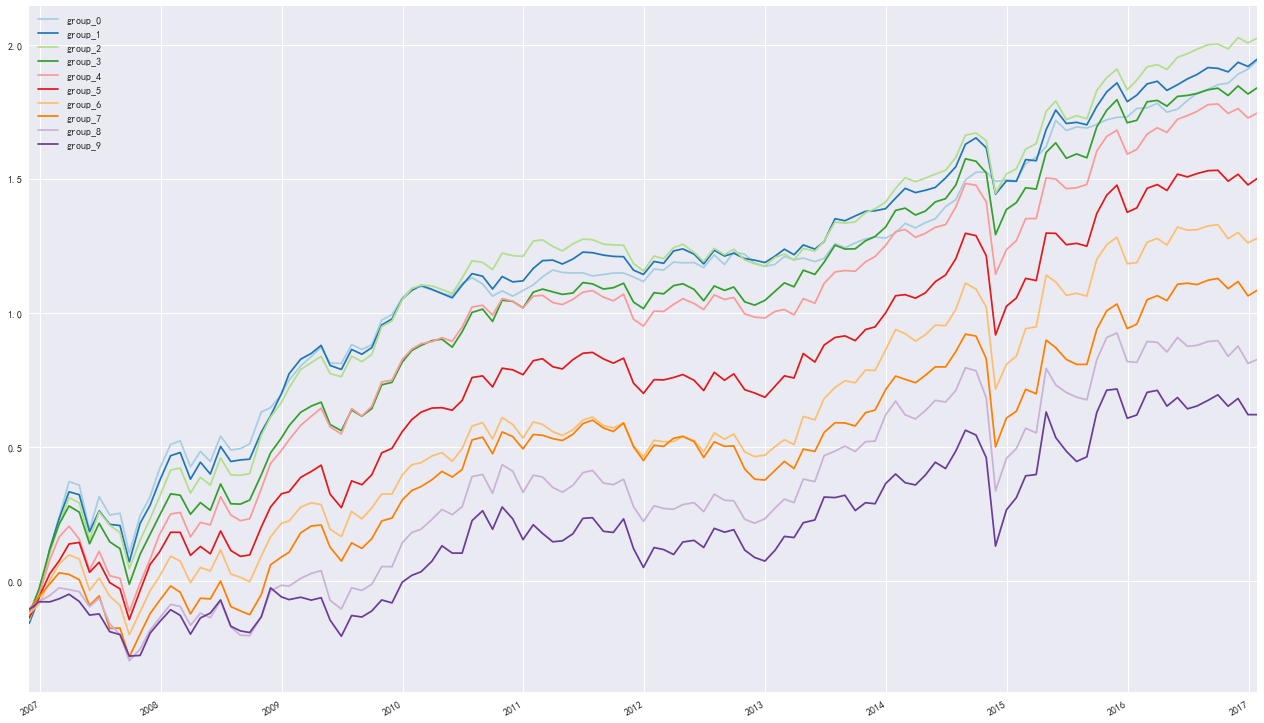

In [333]:
ReturnDF.astype(float).cumsum().plot(figsize=(22,14),color=sns.color_palette("Paired",10))

In [334]:
ReturnDF.head()

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2006-11-30,-0.142793,-0.157659,-0.146974,-0.123333,-0.127339,-0.137509,-0.121812,-0.106463,-0.103971,-0.106121
2006-12-29,0.0834144,0.0924447,0.102305,0.0921113,0.0717828,0.0750159,0.0340746,0.047017,0.0262135,0.0280424
2007-01-31,0.179431,0.184722,0.148353,0.148069,0.134578,0.0895165,0.0910915,0.0486025,0.0233959,-0.000321852
2007-02-28,0.116653,0.111771,0.107105,0.0945976,0.0837666,0.0472379,0.0593028,0.0407883,0.0280248,0.0113151
2007-03-30,0.1334,0.100888,0.0992985,0.0679173,0.0411494,0.063326,0.0345221,-0.00597872,-0.00616354,0.0171556


In [335]:
ReturnForPlot =ReturnDF.copy()

In [336]:
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(1+x.month) if x.month<12 else\
                                             100*(x.year+1)+1) ### this shows the real time

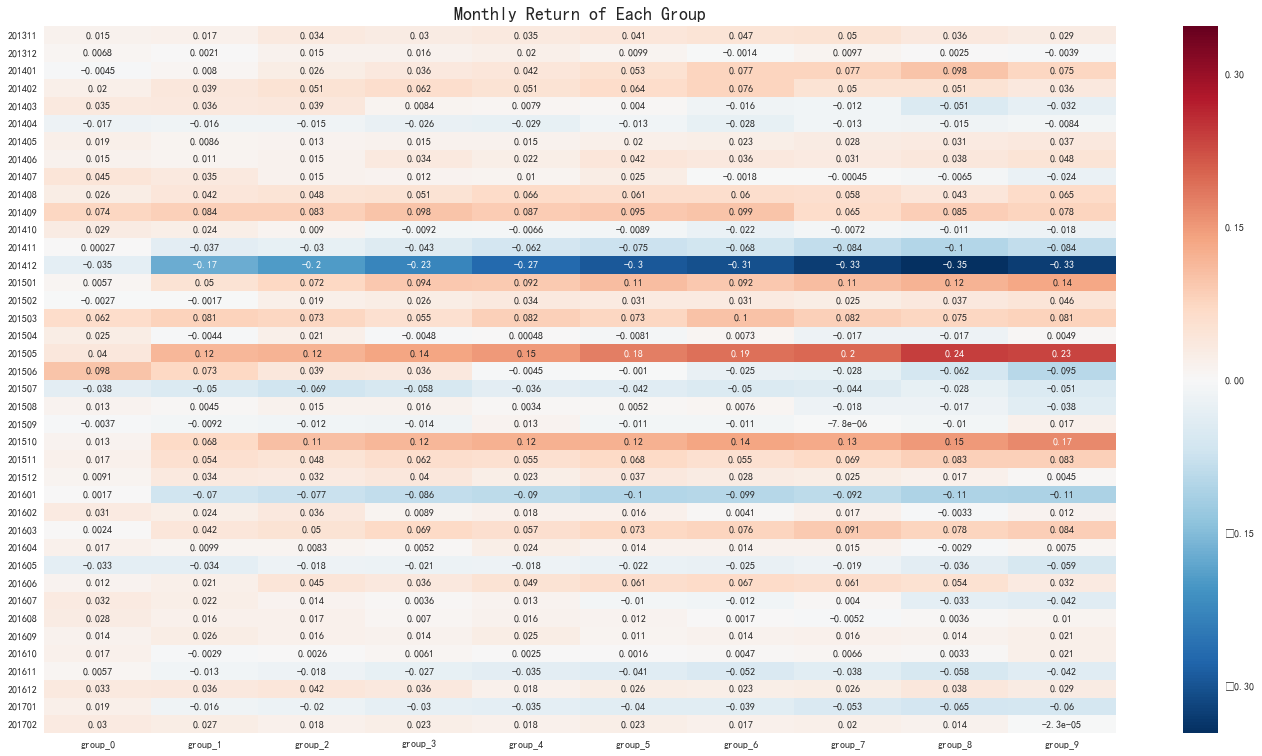

In [337]:
plt.figure(figsize=(24,13))
ax = plt.axes()
sns.heatmap(ReturnForPlot.iloc[-40:].astype(float),ax=ax, annot=True)
ax.set_title('Monthly Return of Each Group',fontsize=18, fontweight='bold')
plt.show()

In [338]:
### the following part is to save return data of every factor into one Dataframe

totalGroupDict ={}
finalDF = pd.DataFrame()
countNum = 0
for i,j in filenameDict.iteritems():
    
    for date in endOfMonthList:
        factorData = ff.getData(j, timeStampNum, thresholdNum)
        factorDataTemp = factorData.loc[:date].tail()
        factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[date]))]
        #print factorDataTemp
        totalGroupDict[date] = ff.getStockGroup(factorDataTemp,Mean_Num=1)
    ReturnDF = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None)
    for group in ReturnDF.columns.tolist():
        for time in ReturnDF.index:
            ReturnDF.loc[time][group] = activeReturnData.loc[time][totalGroupDict[time][group]].mean()
    ReturnDF['factorName'] = i
    if countNum ==0:
        finalDF = ReturnDF
    else:
        finalDF=finalDF.append(ReturnDF)
    countNum+=1
finalDF.sort_index(axis=1,inplace=True)
    #totalGroupDict

In [339]:
#finalDF.shape

In [340]:
#---------------- the following part shows the show the difference of a risk factor across different market capitalzation size----#
#-------------  and different industries ------#

In [341]:
# show the difference of a risk factor through different market capitalzation size
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the tuple of the groups
# Inputs: 
# capdata: DATAFRAME ,the LFCAP DATA
# datelist: LIST, the datelist of the end month
def getGroupsbyCap(capdata, datelist):
    capdict ={}
    for date in datelist:
        capdataindice = capdata.loc[date]
        lower = capdataindice.quantile(1/3)
        upper = capdataindice.quantile(2/3)
        smallcap = capdataindice[capdataindice<=lower].index
        midcap = capdataindice[(lower<capdataindice) & (capdataindice<=upper)].index
        hugecap = capdataindice[capdataindice>upper].index
        capdict[date] = (smallcap,midcap,hugecap)
    return capdict

In [342]:
# industry number
grouplabel = np.random.choice(29,10,replace=False)
grouplabel

array([26,  5, 13,  6, 11,  3,  7,  1, 28,  4])

In [343]:
# show the difference of a risk factor through different industry
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the DICTIONARY of the groups of each industry on that day
# Inputs: 
# datelist: LIST, the datelist of the end month
# grouplable: LIST, the industry label,usually 3 of them is constant and other 3 is randomed  alike [2,3,6,15,18,25]
# industryDF: DATAFRAME,the industry dataframe(could )
def getIndustryDict(datelist,grouplabel,industryDF):
    industrydict = {}
    industryDF = industryDF.loc[datelist]
    for date in datelist:
        industryDFindice = industryDF.loc[date]
        industrydict[date] = {label:industryDFindice[industryDFindice == label].index for label in grouplabel}
    return industrydict

In [344]:
industryDict = getIndustryDict(endOfMonthList,grouplabel,indusDF)

In [345]:
capDict=getGroupsbyCap(LFCAPDF,endOfMonthList)

In [346]:
templist=[endOfMonthList,['mean','median','std']]
capGroupsDF = pd.DataFrame(data=None, columns=['small','mid','huge'],index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)
indusGroupDF  = pd.DataFrame(data=None, columns=grouplabel,index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)

In [347]:
for date in endOfMonthList:
    factorindice = factorData.loc[date]
    smallindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][0]))]
    midindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][1]))]
    hugeindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][2]))]
    capGroupsDF.loc[date,'small'] = [smallindice.mean(),smallindice.median(),smallindice.std()]
    capGroupsDF.loc[date,'mid'] = [midindice.mean(),midindice.median(),midindice.std()]
    capGroupsDF.loc[date,'huge'] = [hugeindice.mean(),hugeindice.median(),hugeindice.std()]
    for i in grouplabel:
        #print grouplabel
        inDFIndice = factorindice.loc[list(set(factorindice.index) & set(industryDict[date][i]))]
        indusGroupDF.loc[date,i] = [inDFIndice.mean(),inDFIndice.median(),inDFIndice.std()]
indusGroupDF.rename(columns = {i:u''+explanationDict[i]+'' for i in grouplabel},inplace=True)

In [348]:
indusGroupDF.head(10)

计算机      基础化工      商贸零售         建筑      国防军工  \
time       stats                                                        
2006-11-30 mean     8.636208  1.920320  3.132417   3.561294  3.494783   
           median   2.156800  1.480600  2.269100   1.909050  3.034800   
           std     29.537326  1.447040  2.455914  12.533789  1.899880   
2006-12-29 mean     8.269142  2.069609  3.176643   3.691931  3.812603   
           median   2.354100  1.462000  2.418600   1.934850  3.159450   
           std     28.355964  1.499828  2.419809  12.440439  2.194028   
2007-01-31 mean     8.548674  2.660551  3.816695   4.366351  4.813292   
           median   3.072200  1.930000  2.878200   2.403900  4.278200   
           std     27.739134  1.905887  2.752023  12.440954  2.714271   
2007-02-28 mean     9.111611  3.053317  4.575137   4.740421  5.327944   

                     电力及公用事业        建材        煤炭        综合        钢铁  
time       stats                                                      
2006-11-30 mean    16.416314  2.490392  3.170055  5.632733  2.172626  
           median   2.781100  1.776800  2.426550  4.543300  1.781650  
           std     72.404850  2.780475  2.010873  3.788442  1.589630  
2006-12-29 mean    16.455448  2.637388  3.373205  6.165420  2.238962  
           median   3.098150  1.909400  2.644650  5.498650  1.813850  
           std     72.395041  2.671702  2.350471  3.704522  1.774942  
2007-01-31 mean    17.252255  3.035069  3.894360  8.441930  2.704110  
           median   3.740050  2.116900  3.143450  6.655450  2.269400  
           std     72.264132  3.100948  2.368594  6.799821  1.794288  
2007-02-28 mean    18.031848  3.527735  4.323010  8.461010  3.246030

In [349]:
capGroupsDF.head()

small       mid      huge
time       stats                                
2006-11-30 mean     8.297664  3.861488  3.881774
           median   2.479200  2.396650  3.010750
           std     47.653316  7.737688  3.084707
2006-12-29 mean     8.017952  4.249066  4.176466
           median   2.507500  2.417400  3.262900

In [350]:
newstack = capGroupsDF.stack().unstack('stats').reset_index()
newstack = newstack.rename(columns = {'level_1':'cap'})
newstack = newstack.pivot_table(index='time',columns='cap')

In [351]:
newstack.head()

stats           mean                       median                         std  \
cap             huge       mid     small     huge      mid    small      huge   
time                                                                            
2006-11-30  3.881774  3.861488  8.297664  3.01075  2.39665  2.47920  3.084707   
2006-12-29  4.176466  4.249066  8.017952  3.26290  2.41740  2.50750  3.217239   
2007-01-31  4.793789  4.157364  9.295606  3.70460  2.92355  3.14390  3.602093   
2007-02-28  5.013319  4.491158  9.974618  3.98080  3.43605  3.88455  3.473851   
2007-03-30  5.241019  7.283191  9.799828  4.33340  3.95355  4.36955  3.252591   

stats                             
cap               mid      small  
time                              
2006-11-30   7.737688  47.653316  
2006-12-29  10.406321  47.155277  
2007-01-31   6.099043  47.941360  
2007-02-28   6.068589  47.774594  
2007-03-30  52.881722  42.887815

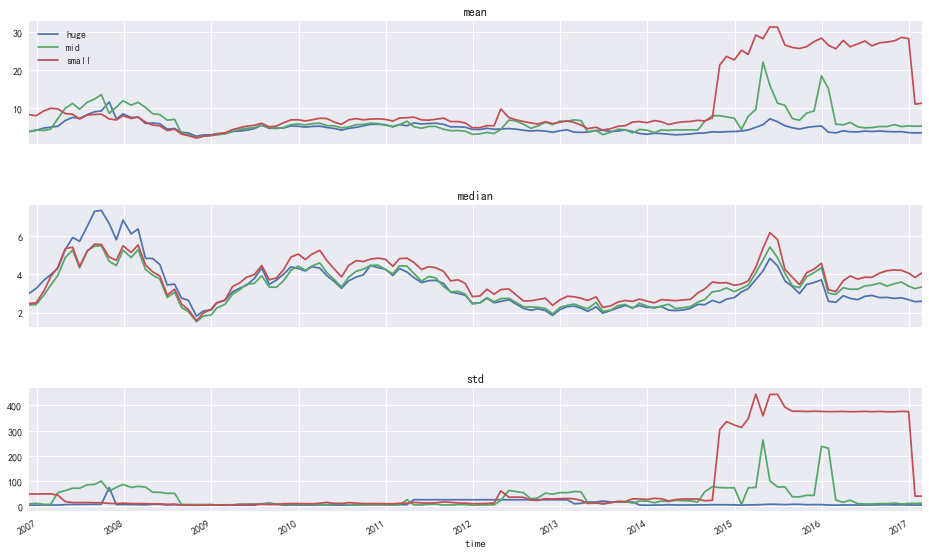

In [352]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstack.columns.levels[0],range(len(newstack.columns.levels[0]))):
    newstack[label].plot(ax=axs[num],legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [353]:
newstackInd = indusGroupDF.stack().unstack('stats').reset_index()
newstackInd = newstackInd.rename(columns = {'level_1':'industry'})
newstackInd = newstackInd.pivot_table(index='time',columns='industry')

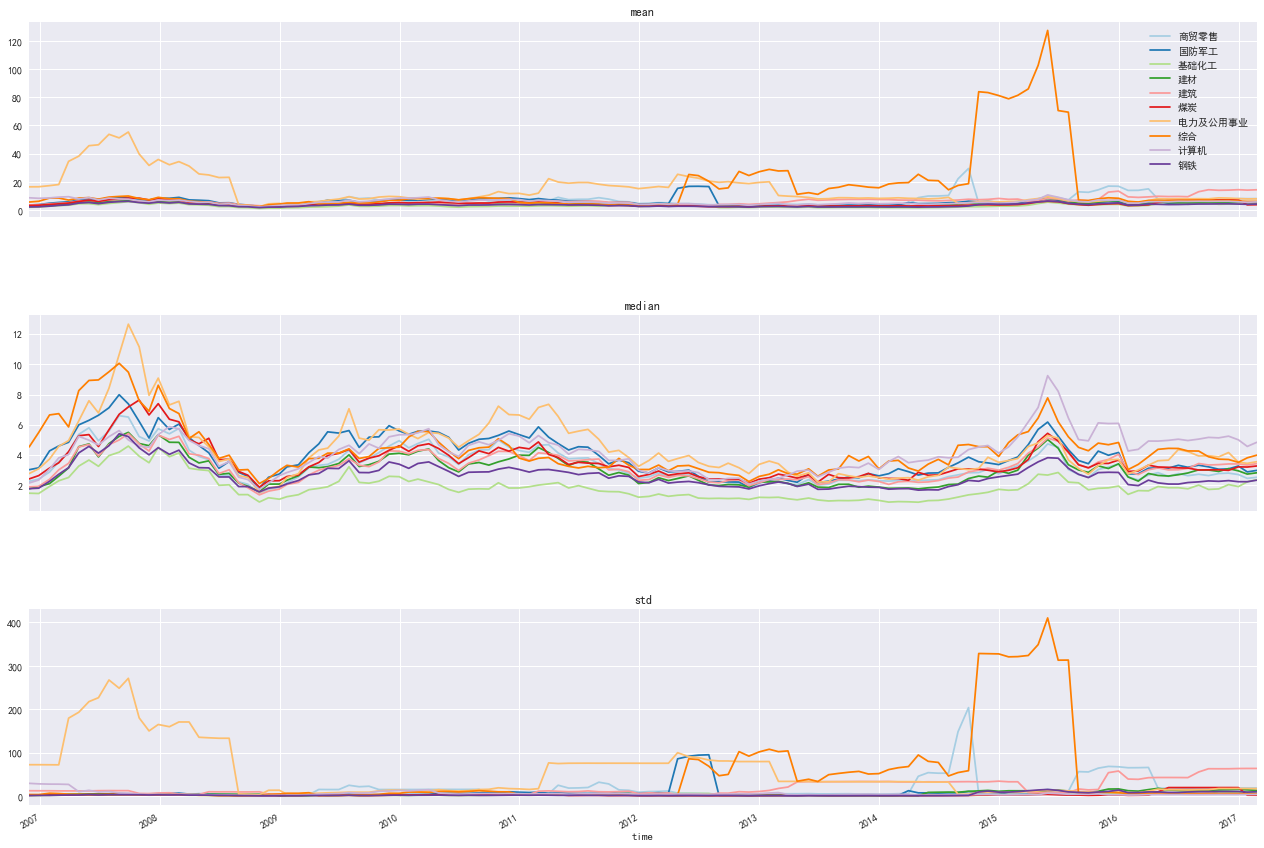

In [354]:
fig, axs = plt.subplots(3,1, figsize=(22, 16), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstackInd.columns.levels[0],range(len(newstackInd.columns.levels[0]))):
    newstackInd[label].plot(ax=axs[num],color=sns.color_palette("Paired",10),legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [355]:
capcopy=capGroupsDF.copy()
copydata=capcopy.reset_index()

In [356]:
copydata.pivot_table(index='time',columns='stats').head()

small                           mid                      \
stats           mean   median        std      mean   median        std   
time                                                                     
2006-11-30  8.297664  2.47920  47.653316  3.861488  2.39665   7.737688   
2006-12-29  8.017952  2.50750  47.155277  4.249066  2.41740  10.406321   
2007-01-31  9.295606  3.14390  47.941360  4.157364  2.92355   6.099043   
2007-02-28  9.974618  3.88455  47.774594  4.491158  3.43605   6.068589   
2007-03-30  9.799828  4.36955  42.887815  7.283191  3.95355  52.881722   

                huge                     
stats           mean   median       std  
time                                     
2006-11-30  3.881774  3.01075  3.084707  
2006-12-29  4.176466  3.26290  3.217239  
2007-01-31  4.793789  3.70460  3.602093  
2007-02-28  5.013319  3.98080  3.473851  
2007-03-30  5.241019  4.33340  3.252591

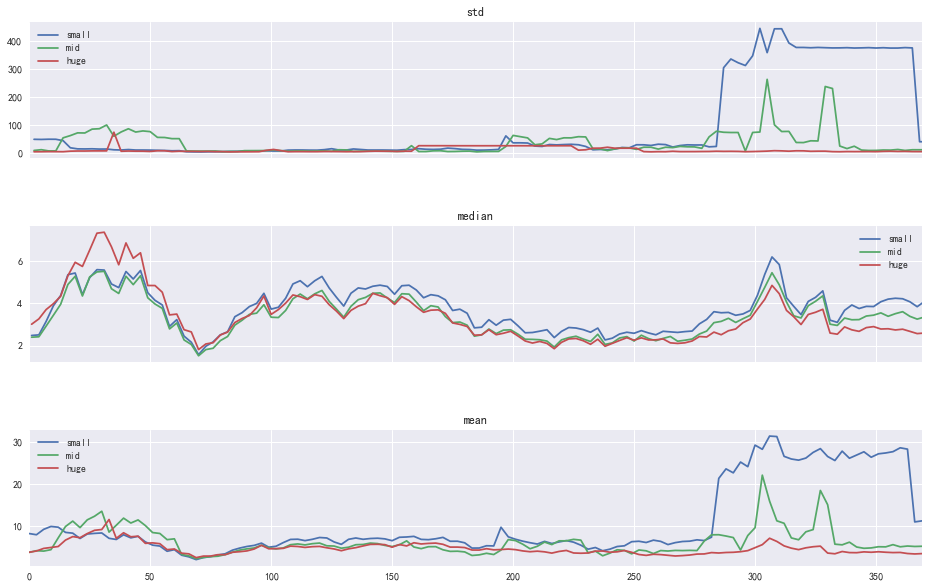

In [357]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(set(copydata['stats']),range(len(set(copydata['stats'])))):
    #print label,num
    dataslice = copydata[copydata['stats']==label]
    dataslice.plot(ax=axs[num])
    axs[num].set_title(label)